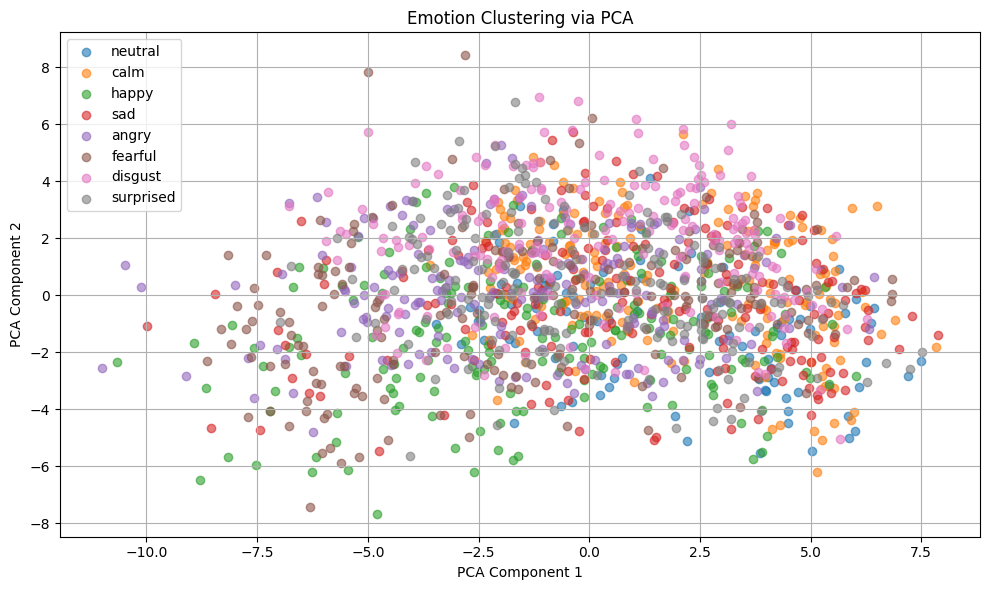

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your features CSV
df = pd.read_csv("features_ravdess_04.csv")

# Separate features and labels
X = df.drop(columns=["filename", "label"])
y = df["label"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA result
plt.figure(figsize=(10, 6))
for emotion in y.unique():
    idx = y == emotion
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=emotion, alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Emotion Clustering via PCA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Load and preprocess data
X = df.drop(columns=["filename", "label"])
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utility for colored scatter plots
def plot_scatter(X_reduced, title, labels):
    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        idx = labels == label
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=label, alpha=0.6)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

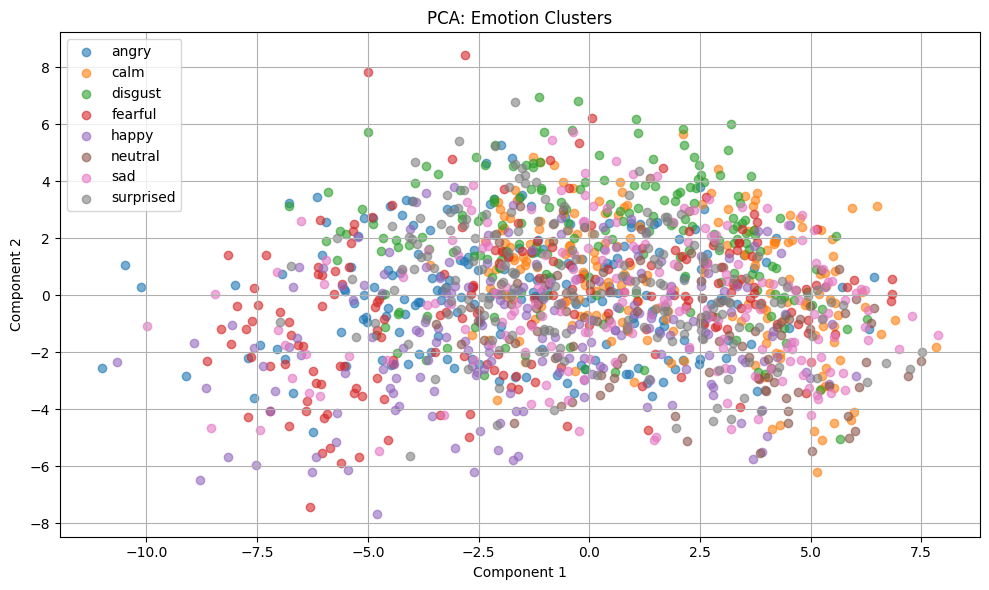

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_scatter(X_pca, "PCA: Emotion Clusters", y)

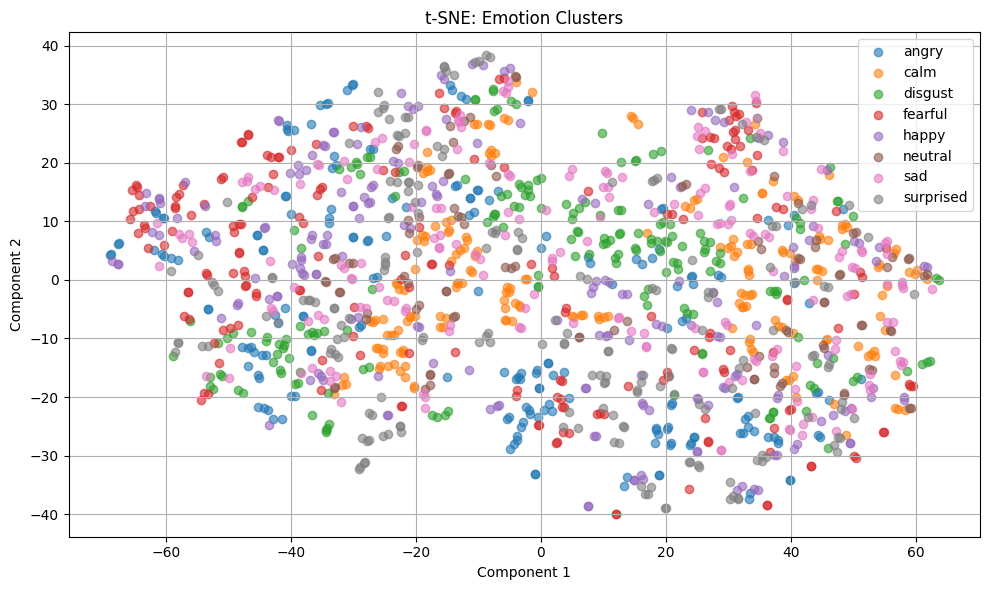

In [12]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_scatter(X_tsne, "t-SNE: Emotion Clusters", y)

C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


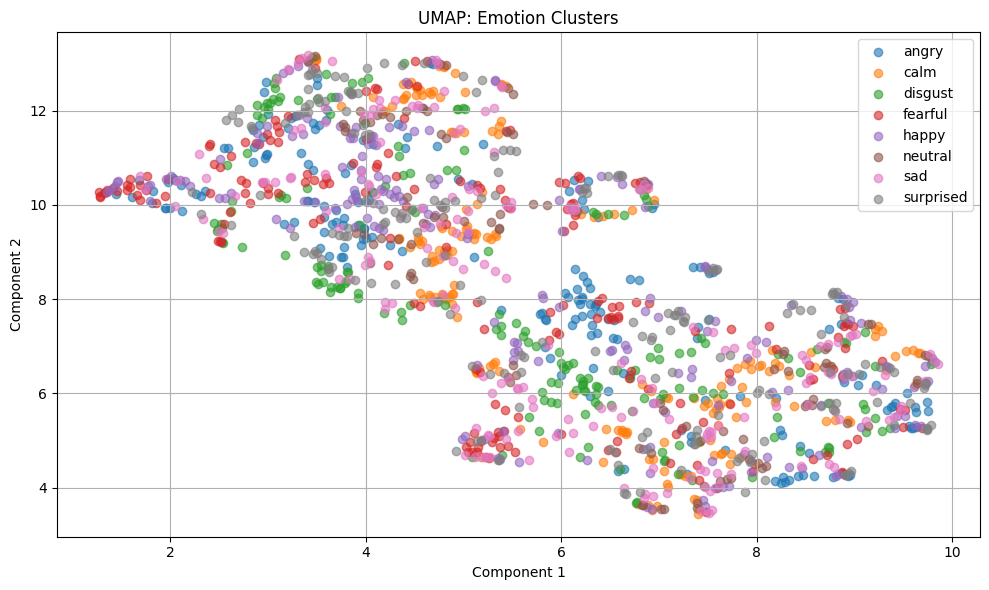

In [13]:
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)
plot_scatter(X_umap, "UMAP: Emotion Clusters", y)

In [ ]:
sampled_df = df.copy()
sampled_df["label"] = y
feature_cols = df.columns.difference(["filename", "label"]).tolist()
sns.pairplot(sampled_df, hue="label", vars=feature_cols)
plt.suptitle("Pairplot: Selected Raw Features", y=1.02)
plt.show()